You train your model with train data alwaysand then use test data to predict the values

Here aim is to build a predictive model and find out the sales of each product at a particular store

In [657]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols


#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

# Train data

In [658]:
df=pd.read_csv('bigdatamart_Train.csv')
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Here sales is numerical data, hence we will be doing regression here

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


12 columns are present

with 5 numerical and 7 string

# EDA

In [660]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


maximum count of columns is 8523

there are null values in Item_Weight and Outlet_Size

In [661]:
#dropping Item_Identifier because of the high number of unique values,to avoid standardisation error
df=df.drop(columns=["Item_Identifier"])

In [662]:
#checking nan
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [663]:
#removing Item_Weight nan with mean
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [664]:
#removing Outlet_Size
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)

In [665]:
#checking nan
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Null values removed

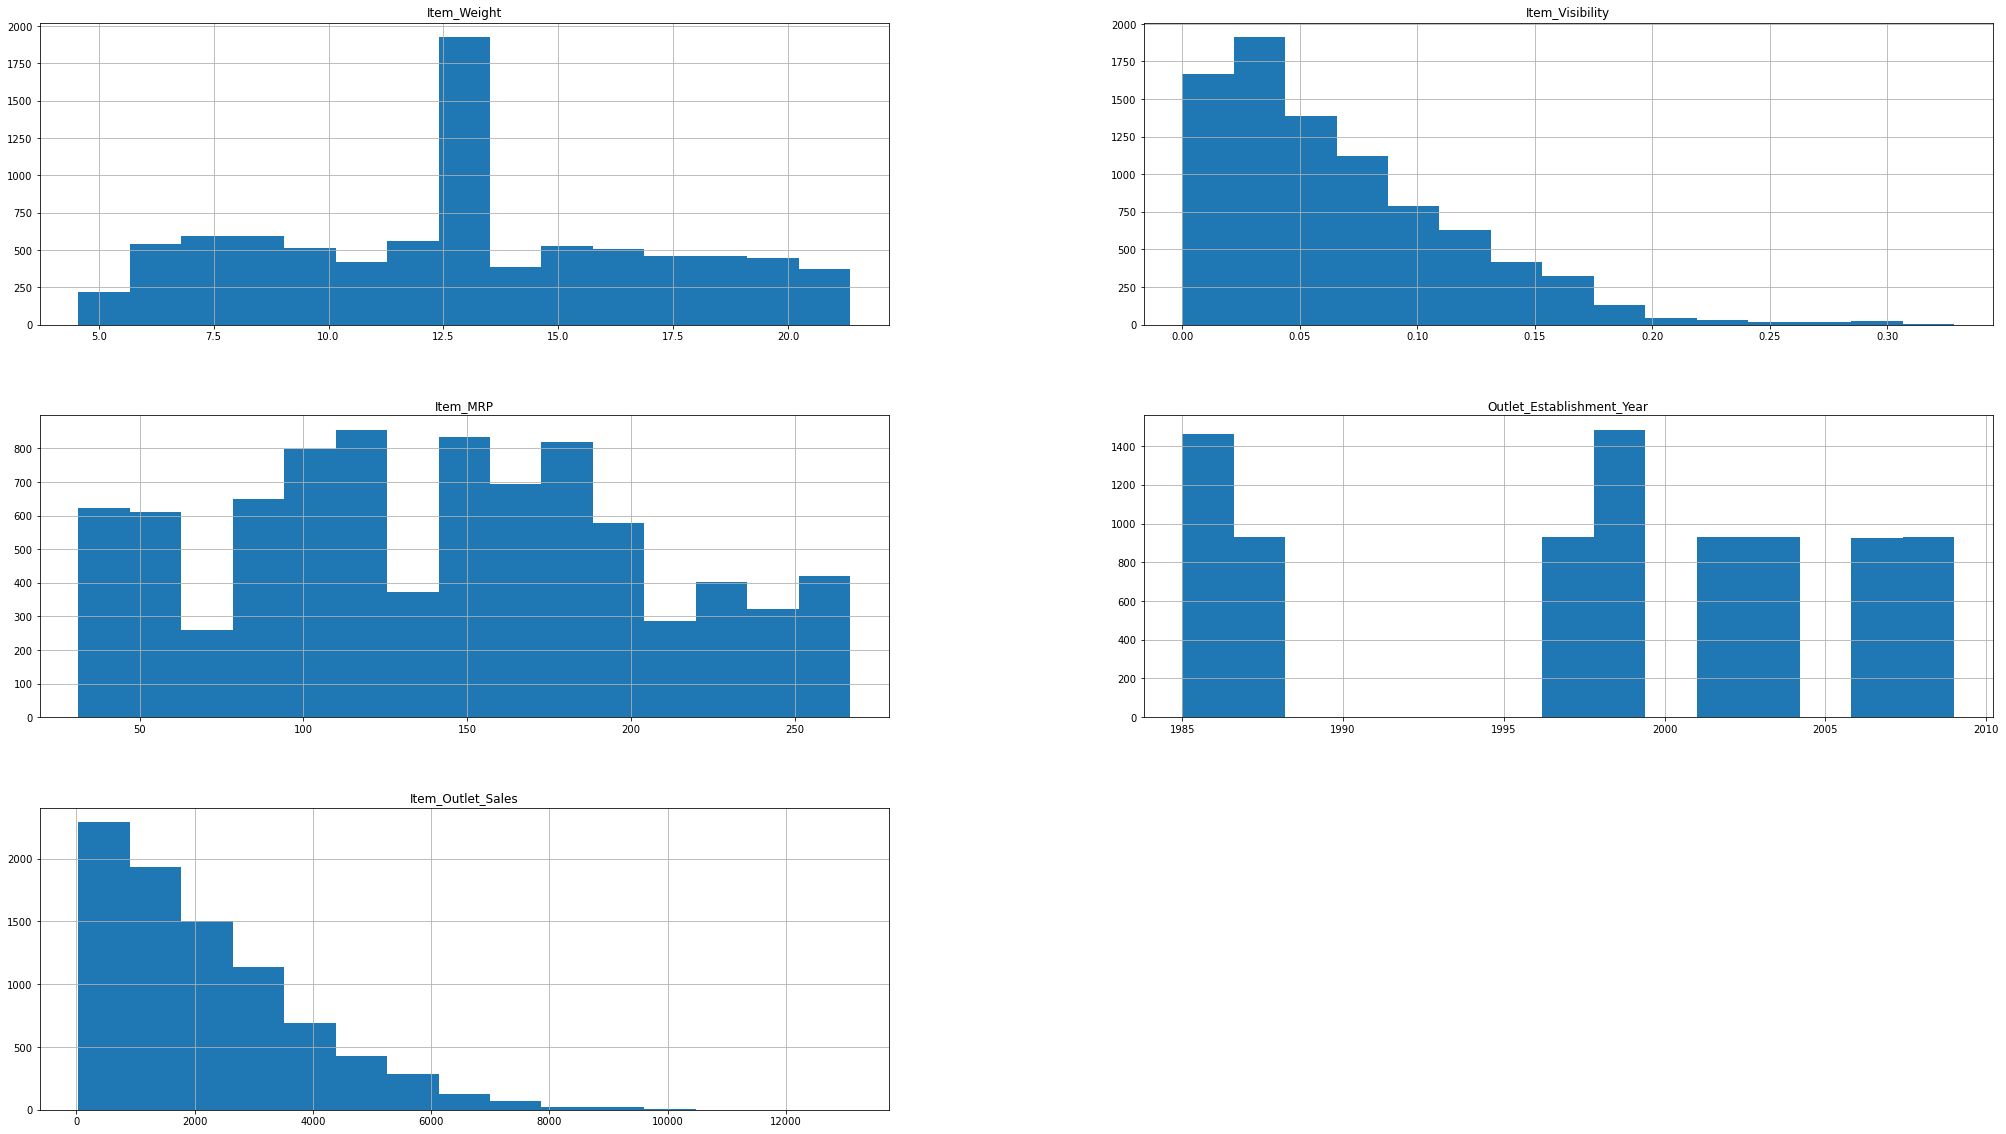

In [666]:
#Checking skewness
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


Label or target is Item_Outlet_Sales

In [667]:
#encoding
import pandas as pd
df1=pd.get_dummies(df)

In [668]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [669]:
df1=pd.get_dummies(df)

In [670]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [671]:
#removing the outliers
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(df1))
threshold=3
df1=df1[(z<3).all(axis=1)]

In [672]:
print("Dataframe shape with outliers",df.shape)
print("Dataframe shape without outliers",df1.shape)

Dataframe shape with outliers (8523, 11)
Dataframe shape without outliers (3408, 46)


In [673]:
#standardising the data for PCA
x=df1.drop(columns=["Item_Outlet_Sales"])
y_train=df1['Item_Outlet_Sales']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [674]:
#PCA

from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 17.28422203,  30.69036173,  40.47221313,  50.02797025,
        58.88719528,  67.03210693,  72.25014409,  77.18457726,
        81.44729794,  85.64057289,  89.44755858,  93.14772707,
        96.69865813, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [675]:
# PCs explaines 95% of the variance?

k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  12


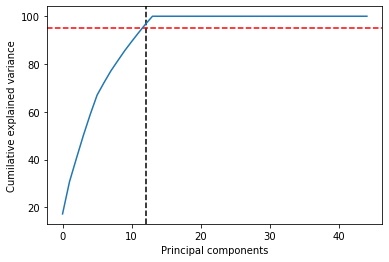

In [676]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [677]:
# Creating final dataset with 30 columns

FinalPCA=PCA(n_components=12)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.252742,3.611410,-2.425993,0.885480,1.890861,-1.122204,-0.009462,0.528704,-0.154791,0.046782,-0.291671,0.236067
1,1.221474,3.552195,-2.324523,1.043758,-1.868971,-0.806296,1.781762,-0.400389,-0.052255,0.400191,0.104202,-0.811832
2,3.867076,0.699966,1.260768,-2.643644,0.600941,1.293466,1.520769,-0.727344,-0.057999,0.242658,1.744787,0.463350
3,-1.052829,-1.431116,-1.197983,-1.286334,-1.884869,-0.469159,-0.073966,1.615296,2.303082,-1.481093,-0.462596,-1.339004
4,-1.255808,-1.812322,-1.279931,-0.976893,-1.975471,-0.443088,-0.022696,2.556051,-0.422213,1.444228,-0.111780,-1.003199
...,...,...,...,...,...,...,...,...,...,...,...,...
3403,-1.046158,-1.439516,-1.237842,-1.272110,-2.011554,-0.493045,-1.489612,-1.360115,1.848846,-0.775374,-1.227408,0.230513
3404,-2.537617,-0.034972,-0.701943,0.280685,-1.479905,2.764609,1.735414,-1.153669,-1.090137,-0.710529,-1.112181,-0.453538
3405,2.711942,-2.664093,0.077587,3.021424,0.941815,0.253224,0.017984,1.592423,0.372945,-0.643809,-1.364847,-0.553688
3406,1.180767,3.544448,-2.356985,0.968025,0.593551,-0.953767,1.878100,-0.884553,-0.091710,0.161435,-0.600315,1.732261


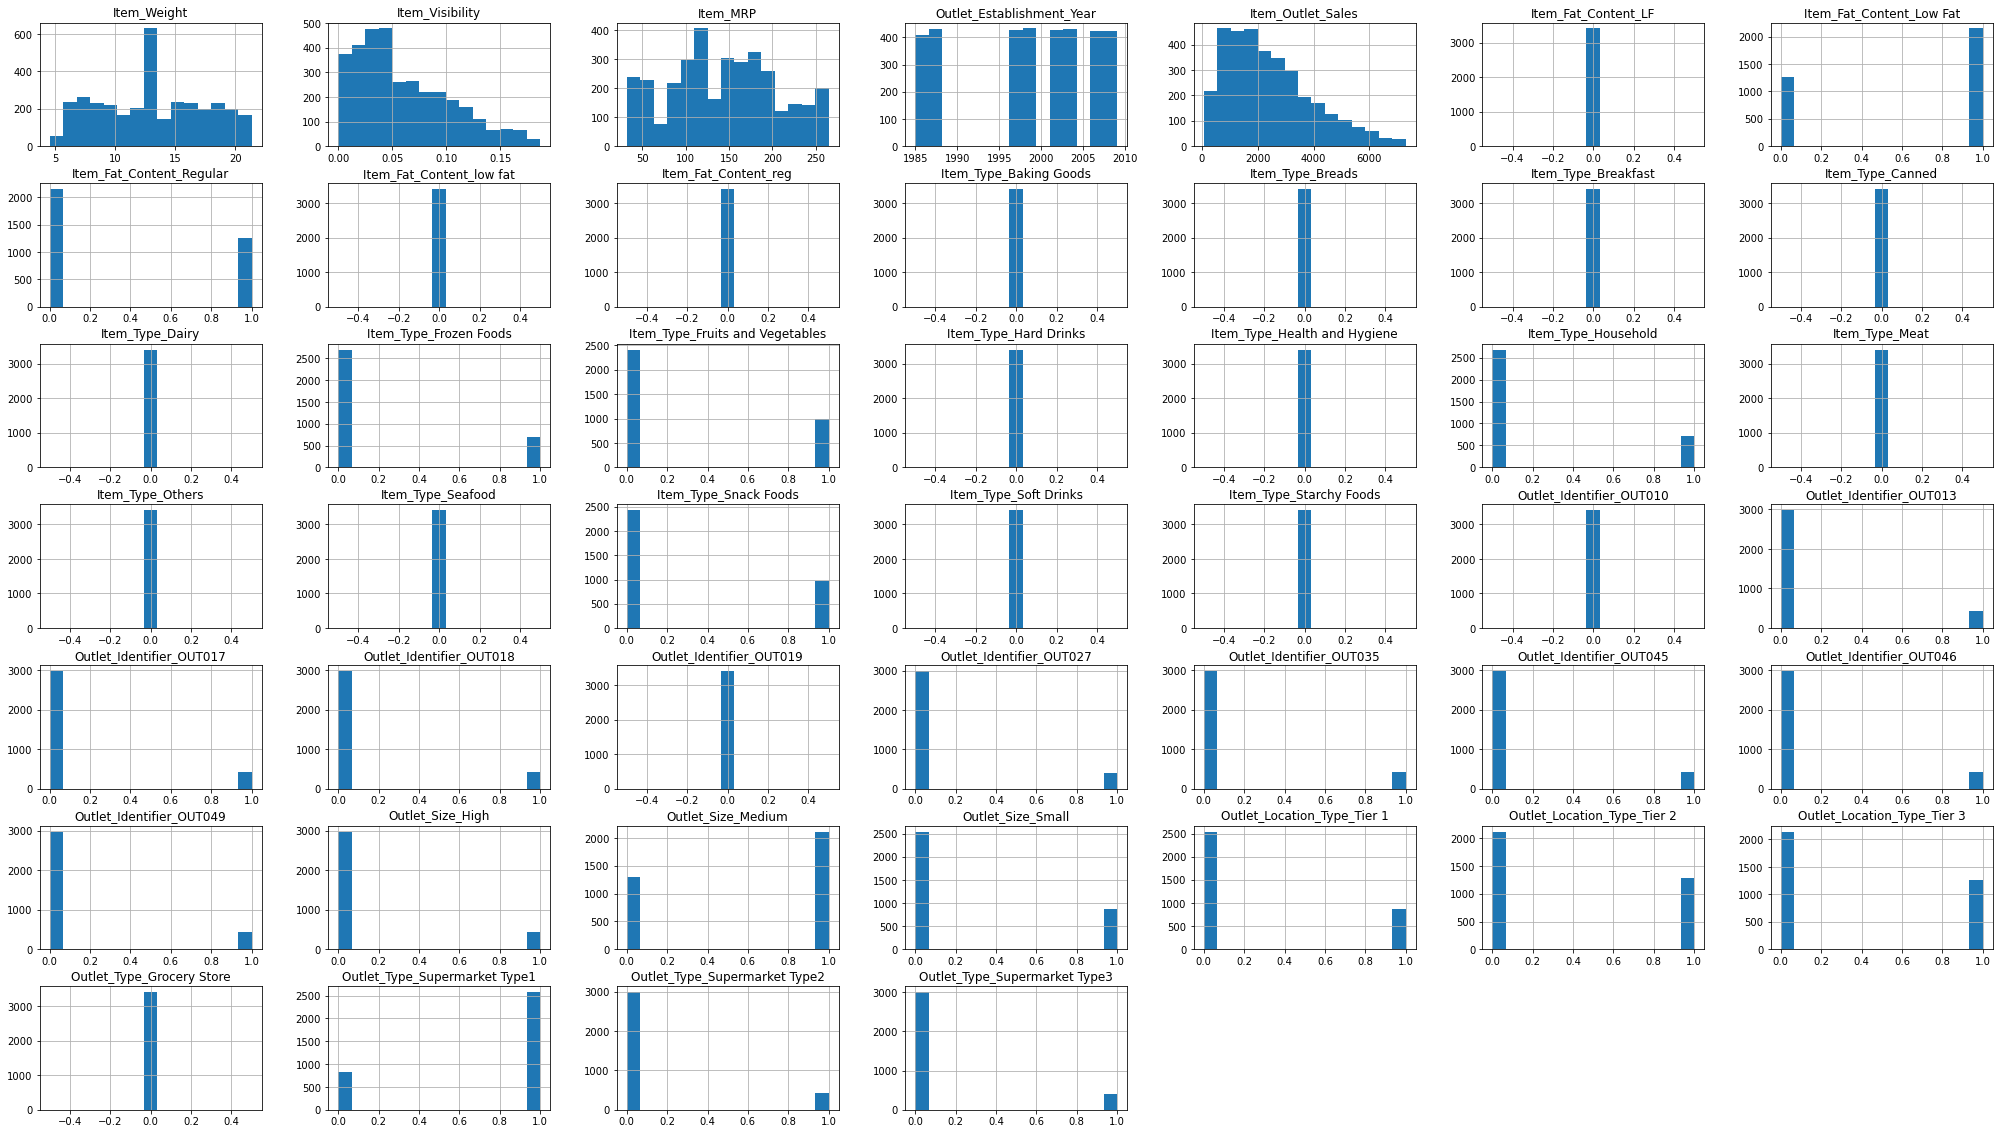

In [678]:
df1.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [679]:
x_train=df1

# Test data

In [680]:
df_test=pd.read_csv('bigdatamart_Test.csv')
df_test.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [681]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [682]:
df_test.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,NCS41,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [683]:
#dropping Item_Identifier because of the high number of unique values,to avoid standardisation error
df_test=df_test.drop(columns=["Item_Identifier"])

In [684]:
#checking nan
df_test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [685]:
#removing Item_Weight nan with mean
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

#removing Outlet_Size
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [686]:
#checking nan
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [687]:
#encoding
import pandas as pd
df2=pd.get_dummies(df_test)
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [688]:
#standardising the data for PCA
x=df2

In [689]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaledX=scaler.fit_transform(x)
scaledX=x

In [690]:
#removing the outliers
import numpy as np
from scipy.stats import zscore

z1=np.abs(zscore(x))
threshold=3
df_test=df_test[(z1<3).all(axis=1)]

In [691]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  0


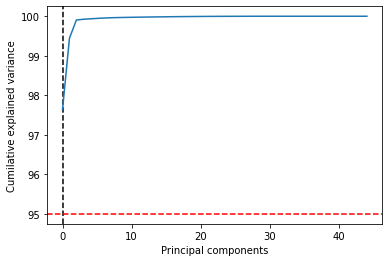

In [692]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [693]:
# Creating final dataset with 30 columns

FinalPCA=PCA(n_components=12)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-33.136492,-1.221441,8.149598,-0.251909,-0.476825,0.231453,-0.815121,0.975010,-0.041505,0.703134,0.456149,-0.054340
1,-53.725964,-9.117585,-4.314724,-0.070600,0.202901,-0.709940,-0.362969,-0.059552,0.145678,-0.003464,0.049784,-0.518776
2,100.735994,-0.259214,1.588003,1.000493,-0.501915,0.428585,-0.004201,-0.336441,0.970800,-0.007410,0.123078,-0.334227
3,13.985106,-9.174660,-5.507104,-0.078848,-0.466867,-0.745183,-0.329365,-0.058955,0.153680,0.726244,0.725996,-0.317872
4,93.219126,12.765307,-0.176014,1.101937,0.911835,-0.192074,-0.488938,-0.481302,-0.695166,-0.052874,-0.182172,-0.168681
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.285839,0.865595,-2.193610,-1.226597,0.824844,0.809002,0.083328,0.271982,-0.488142,0.734539,0.524819,0.161224
5677,28.094237,-11.141471,-5.299128,1.385045,0.796515,0.852082,0.542485,0.135679,-0.214962,-0.013021,-0.222297,0.176204
5678,-22.291676,-4.168844,-2.656934,-0.123055,-0.551335,-0.885134,-0.462866,-0.124769,0.201521,0.013179,-0.209970,0.757606
5679,73.596906,-9.306354,2.279162,-0.080162,0.984103,-0.638637,-0.340752,-0.010735,0.175608,0.012186,-0.048250,-0.601830


In [694]:
df_test=FinalData2

In [695]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11
0,-33.136492,-1.221441,8.149598,-0.251909,-0.476825,0.231453,-0.815121,0.975010,-0.041505,0.703134,0.456149,-0.054340
1,-53.725964,-9.117585,-4.314724,-0.070600,0.202901,-0.709940,-0.362969,-0.059552,0.145678,-0.003464,0.049784,-0.518776
2,100.735994,-0.259214,1.588003,1.000493,-0.501915,0.428585,-0.004201,-0.336441,0.970800,-0.007410,0.123078,-0.334227
3,13.985106,-9.174660,-5.507104,-0.078848,-0.466867,-0.745183,-0.329365,-0.058955,0.153680,0.726244,0.725996,-0.317872
4,93.219126,12.765307,-0.176014,1.101937,0.911835,-0.192074,-0.488938,-0.481302,-0.695166,-0.052874,-0.182172,-0.168681
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.285839,0.865595,-2.193610,-1.226597,0.824844,0.809002,0.083328,0.271982,-0.488142,0.734539,0.524819,0.161224
5677,28.094237,-11.141471,-5.299128,1.385045,0.796515,0.852082,0.542485,0.135679,-0.214962,-0.013021,-0.222297,0.176204
5678,-22.291676,-4.168844,-2.656934,-0.123055,-0.551335,-0.885134,-0.462866,-0.124769,0.201521,0.013179,-0.209970,0.757606
5679,73.596906,-9.306354,2.279162,-0.080162,0.984103,-0.638637,-0.340752,-0.010735,0.175608,0.012186,-0.048250,-0.601830


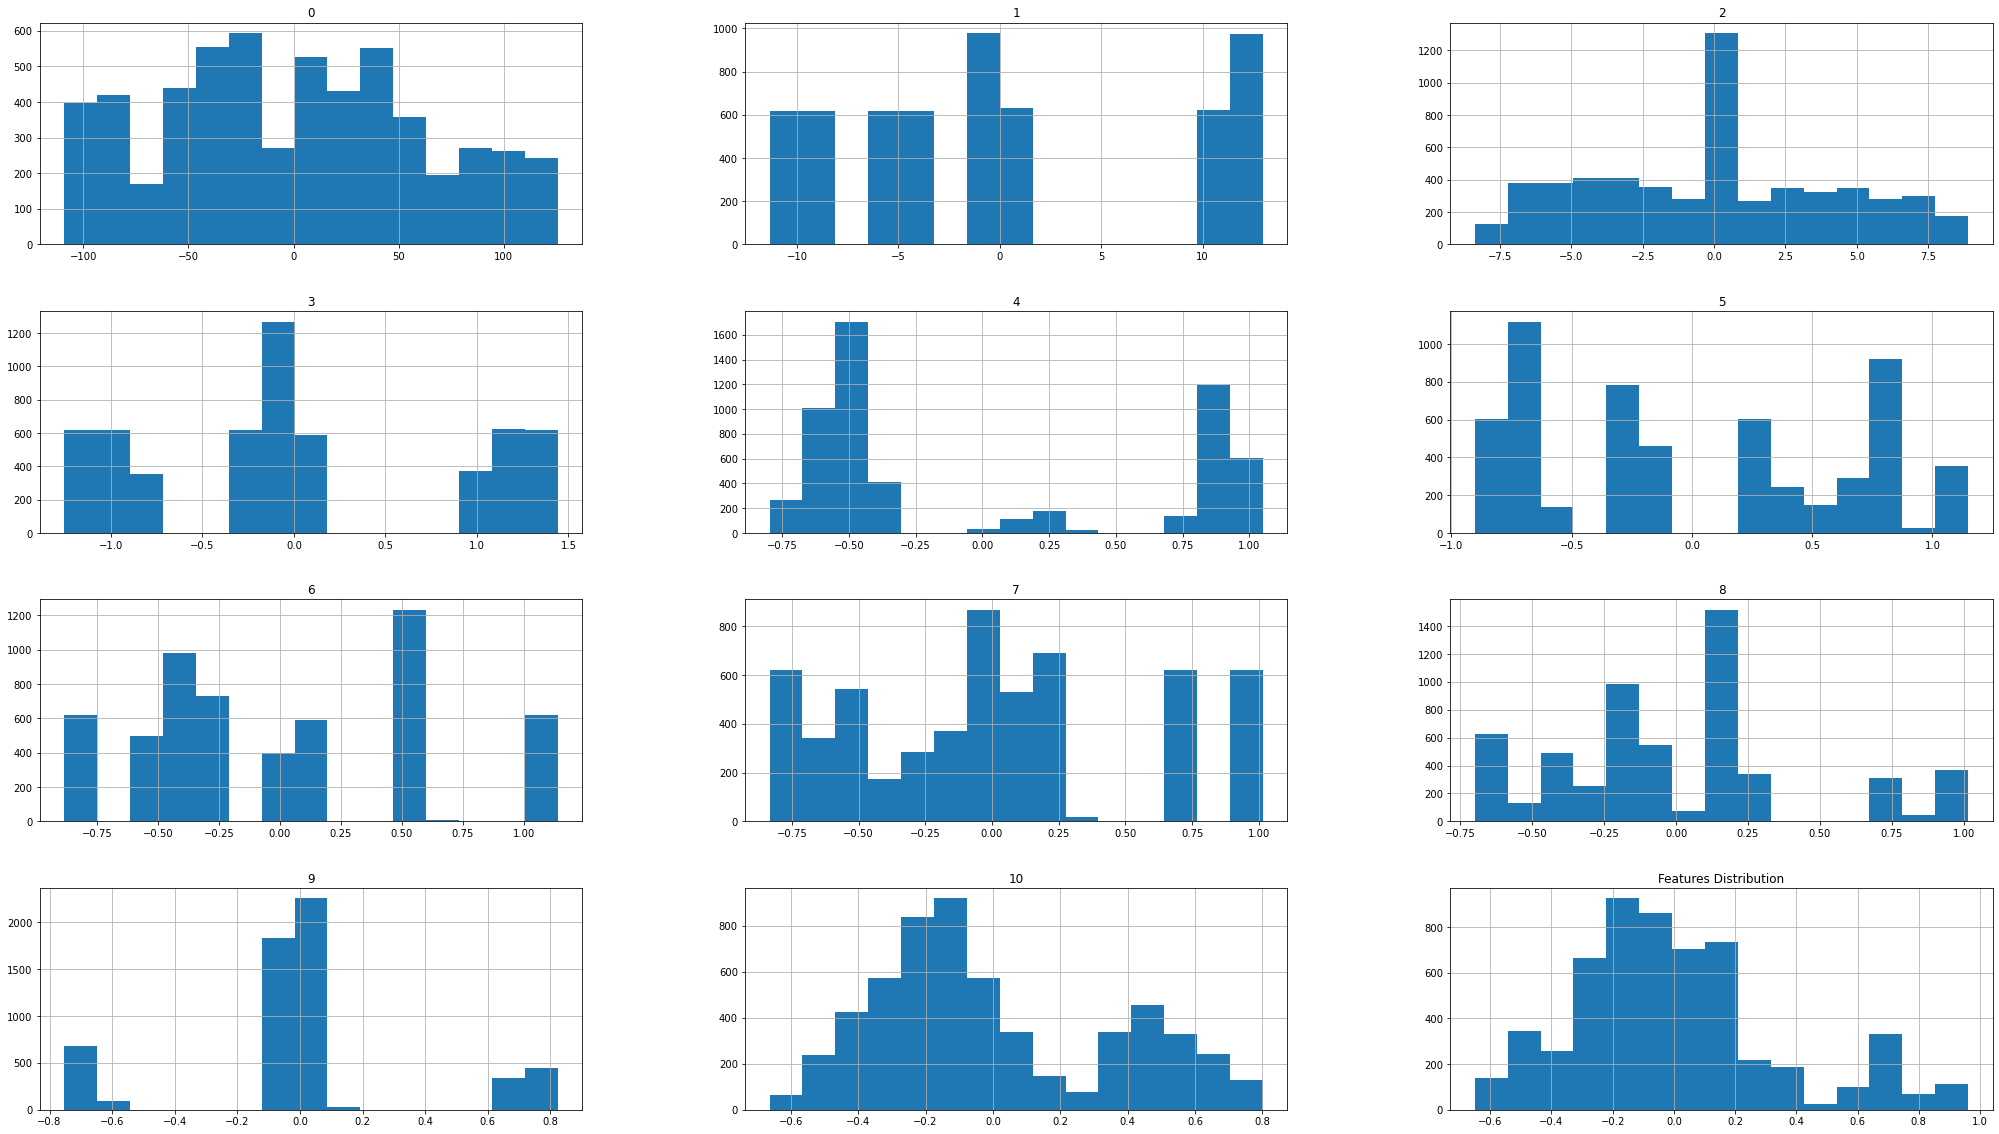

In [696]:
df_test.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

In [697]:
x_test=df_test

# Modeling

In [698]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [699]:
#DecisionTreeClassifier
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [700]:
#RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [701]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr=cross_val_score(LR,x_train,y_train,cv=5)
print("Cross validation score of Linear Regression model :", scr.mean())

scr=cross_val_score(dt,x_train,y_train,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x_train,y_train,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())


Cross validation score of Linear Regression model : 1.0
Cross validation score of Decision Tree model : 0.9999796299088695
Cross validation score of Random Forest model : 0.9999894605622501


cv_score is highest in Linear Regression model

In [702]:
#Hyperparamter tuning

from sklearn.model_selection import GridSearchCV 
parameters = {'fit_intercept':['True', 'False'],
               'normalize':['True', 'False'],
                'copy_X':['True', 'False'],
 }


GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [703]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False']})

In [704]:
GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', normalize='True')

In [705]:
mod=LinearRegression(copy_X='True', fit_intercept='True', normalize='True')

In [707]:
#saving LinearRegression model
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

In [708]:
#Adjusted R2
LinearRegression_tree_model.score(x_train,y_train)

1.0